<a href="https://colab.research.google.com/github/v2047/Data-Analysis/blob/main/Aadhaar_Enrollment_and_Update_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analysis of Enrollment Data


In [1]:
import pandas as pd

files = [
    "/content/drive/MyDrive/Goverment_DataSet/api_data_aadhar_enrolment_0_500000.csv",
    "/content/drive/MyDrive/Goverment_DataSet/api_data_aadhar_enrolment_1000000_1006029.csv",
    "/content/drive/MyDrive/Goverment_DataSet/api_data_aadhar_enrolment_500000_1000000.csv"
]

df_list = [pd.read_csv(file) for file in files]
enrollment_df = pd.concat(df_list, ignore_index=True)

enrollment_df.shape

(1006029, 7)

In [2]:
enrollment_df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [3]:
enrollment_df.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [4]:
enrollment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


### Info Summary

The info() summary shows that there are no missing values across the dataset.
However, since the date column is not in datetime format, it must be converted to ensure accurate temporal analysis.



In [5]:
enrollment_df.describe()

,pincode,age_0_5,age_5_17,age_18_greater
count,1.006029e+06,1.006029e+06,1.006029e+06,1.006029e+06
mean,5.186415e+05,3.525709e+00,1.710074e+00,1.673441e-01
std,2.056360e+05,1.753851e+01,1.436963e+01,3.220525e+00
min,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.636410e+05,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.174170e+05,2.000000e+00,0.000000e+00,0.000000e+00
75%,7.001040e+05,3.000000e+00,1.000000e+00,0.000000e+00
max,8.554560e+05,2.688000e+03,1.812000e+03,8.550000e+02


### Statistical Summary (Describe)

The statistical summary shows significant variation in enrollment counts across age groups.
The median values for age groups 5–17 and 18+ are zero, indicating that many regions report
no enrollments while a small number of regions contribute disproportionately high values.

This skewed distribution suggests uneven enrollment patterns, which may point to
geographical, infrastructural, or accessibility-related disparities.


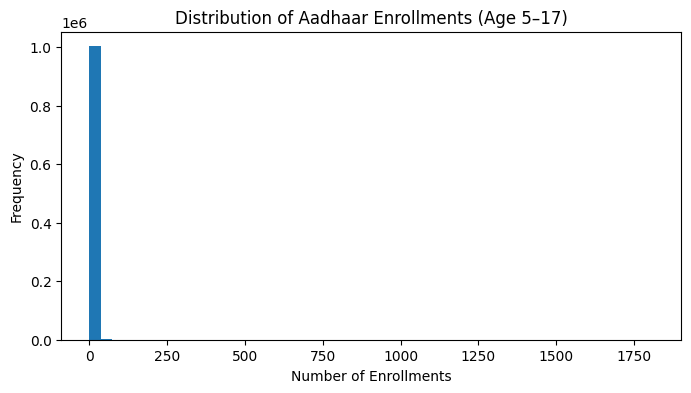

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(enrollment_df['age_5_17'], bins=50)
plt.title('Distribution of Aadhaar Enrollments (Age 5–17)')
plt.xlabel('Number of Enrollments')
plt.ylabel('Frequency')
plt.show()

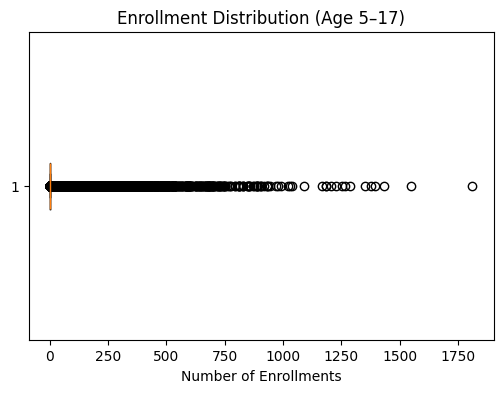

In [7]:
plt.figure(figsize=(6,4))
plt.boxplot(enrollment_df['age_5_17'], vert=False)
plt.title('Enrollment Distribution (Age 5–17)')
plt.xlabel('Number of Enrollments')
plt.show()

### Visualization Summary

The histogram and box plot together indicate a highly right-skewed distribution of Aadhaar enrollments for the 5–17 age group. Most regions record very low enrollment counts, while a small number of regions exhibit exceptionally high values, appearing as outliers.

**Insight:** This uneven distribution highlights disparities in enrollment activity across regions, which may contribute to delays or challenges in Aadhaar updates in low-activity or underserved areas.

 ### Analyze Age 18+ Distribution


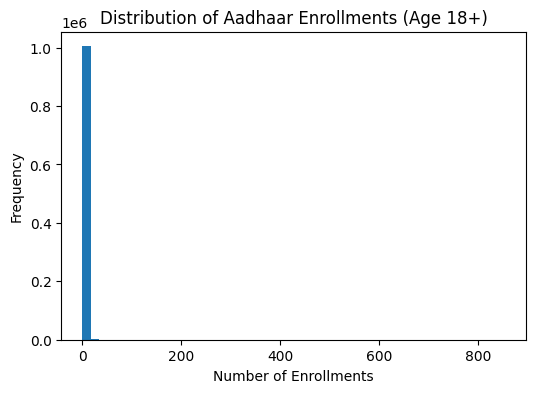

In [8]:
plt.figure(figsize=(6,4))
plt.hist(enrollment_df['age_18_greater'], bins=50)
plt.title('Distribution of Aadhaar Enrollments (Age 18+)')
plt.xlabel('Number of Enrollments')
plt.ylabel('Frequency')
plt.show()

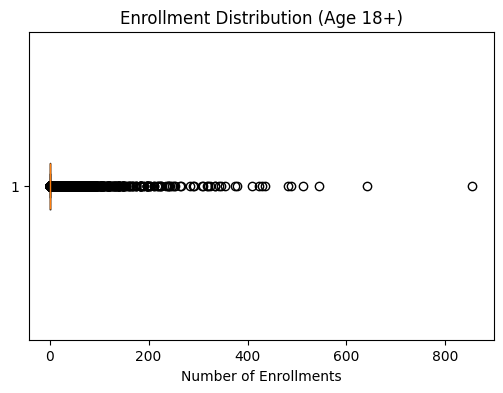

In [9]:
plt.figure(figsize=(6,4))
plt.boxplot(enrollment_df['age_18_greater'], vert=False)
plt.title('Enrollment Distribution (Age 18+)')
plt.xlabel('Number of Enrollments')
plt.show()

### Visualization Summary (Age 18+):
The histogram and box plot together indicate a highly right-skewed distribution of Aadhaar enrollments for the 18+ age group. Most regions show very low enrollment activity, while a small number of regions exhibit extremely high values, appearing as outliers. These outliers represent regions with disproportionately high Aadhaar update or enrollment activity rather than data anomalies.

**Insight:**
The presence of multiple high-value outliers highlights regional disparities in Aadhaar services. High-activity regions may reflect urbanization, migration, or repeated biometric and demographic updates, whereas low-activity regions may face access or operational challenges.

**Key Insights from Enrollment Data:**

Aadhaar enrollments show a highly right-skewed distribution, indicating uneven enrollment activity across regions.

A small number of regions act as high-volume enrollment hubs, while most regions record very low counts.

Such imbalance may lead to service overload in high-activity regions and access challenges in low-activity areas, especially for updates.

### Analysis for the Demographic Dataset

In [10]:
import pandas as pd

files = [
    "/content/drive/MyDrive/Goverment_DataSet/api_data_aadhar_demographic_0_500000.csv",
    "/content/drive/MyDrive/Goverment_DataSet/api_data_aadhar_demographic_1000000_1500000.csv",
    "/content/drive/MyDrive/Goverment_DataSet/api_data_aadhar_demographic_1500000_2000000.csv",
    "/content/drive/MyDrive/Goverment_DataSet/api_data_aadhar_demographic_2000000_2071700.csv",
    "/content/drive/MyDrive/Goverment_DataSet/api_data_aadhar_demographic_500000_1000000.csv"

]

df_list = [pd.read_csv(file) for file in files]
demographic_df = pd.concat(df_list, ignore_index=True)

demographic_df.shape

(2071700, 6)

In [11]:
demographic_df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [12]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB


In [13]:
demographic_df.describe()

,pincode,demo_age_5_17,demo_age_17_
count,2.071700e+06,2.071700e+06,2.071700e+06
mean,5.278318e+05,2.347552e+00,2.144701e+01
std,1.972933e+05,1.490355e+01,1.252498e+02
min,1.000000e+05,0.000000e+00,0.000000e+00
25%,3.964690e+05,0.000000e+00,2.000000e+00
50%,5.243220e+05,1.000000e+00,6.000000e+00
75%,6.955070e+05,2.000000e+00,1.500000e+01
max,8.554560e+05,2.690000e+03,1.616600e+04


**Observation:**

The minimum and 25th percentile values for demographic updates are zero, indicating that at least 25% of districts reported no Aadhaar updates during certain periods. This suggests uneven update activity across regions, with many districts experiencing little to no update requests, while a small subset shows significantly higher volumes.


**Insight:**

Such disparity may reflect accessibility challenges, low awareness, or operational constraints in specific regions, particularly for child and adolescent updates.

In [14]:
#Create total_updates

demographic_df['total_updates'] = (
    demographic_df['demo_age_5_17'] +
    demographic_df['demo_age_17_']
)

In [15]:
# Find % of zero Update districts
import numpy as np

zero_update_pct = (demographic_df['total_updates'] == 0).mean() * 100
zero_update_pct

np.float64(0.10324853984650287)

In [16]:
# Find state level aggregation
state_summary = demographic_df.groupby('state')['total_updates'].sum().sort_values(ascending=False)
state_summary.head(10)

,total_updates
state,
Uttar Pradesh,8542328
Maharashtra,5054602
Bihar,4814350
West Bengal,3872172
Madhya Pradesh,2912938
Rajasthan,2817615
Andhra Pradesh,2295505
Tamil Nadu,2212228
Chhattisgarh,2005434


**Key Findings (Demographic Updates):**

Approximately 10.3% of district-level records show zero Aadhaar demographic updates, highlighting regions with little to no update activity. State-wise aggregation reveals that highly populated states such as Uttar Pradesh, Maharashtra, and Bihar account for the largest share of updates, indicating heavy system usage and potential operational strain.

**Implication:**

While populous states drive overall update volumes, a significant portion of regions remain under-served, suggesting uneven access to Aadhaar update facilities and possible barriers such as biometric mismatches or limited service availability

### Analysis of Biometric DataSet

In [17]:
import pandas as pd

files = [
    "/content/drive/MyDrive/Goverment_DataSet/api_data_aadhar_biometric_0_500000.csv",
    "/content/drive/MyDrive/Goverment_DataSet/api_data_aadhar_biometric_1000000_1500000.csv",
    "/content/drive/MyDrive/Goverment_DataSet/api_data_aadhar_biometric_1500000_1861108.csv",
    "/content/drive/MyDrive/Goverment_DataSet/api_data_aadhar_biometric_500000_1000000.csv"
]

df_list = [pd.read_csv(file) for file in files]
biometric_df = pd.concat(df_list, ignore_index=True)

biometric_df.shape

(1861108, 6)

In [18]:
biometric_df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [20]:
biometric_df.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')

In [19]:
biometric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


In [21]:
biometric_df.describe()

,pincode,bio_age_5_17,bio_age_17_
count,1.861108e+06,1.861108e+06,1.861108e+06
mean,5.217612e+05,1.839058e+01,1.909413e+01
std,1.981627e+05,8.370421e+01,8.806502e+01
min,1.100010e+05,0.000000e+00,0.000000e+00
25%,3.911750e+05,1.000000e+00,1.000000e+00
50%,5.224010e+05,3.000000e+00,4.000000e+00
75%,6.866362e+05,1.100000e+01,1.000000e+01
max,8.554560e+05,8.002000e+03,7.625000e+03


Biometric Observation: The summary statistics show that a large proportion of districts report very low or zero enrollment values, as indicated by the minimum and lower quartile being close to zero. In contrast, the maximum values are significantly higher, suggesting substantial variation across districts. This indicates an uneven distribution of Aadhaar enrollment activity.

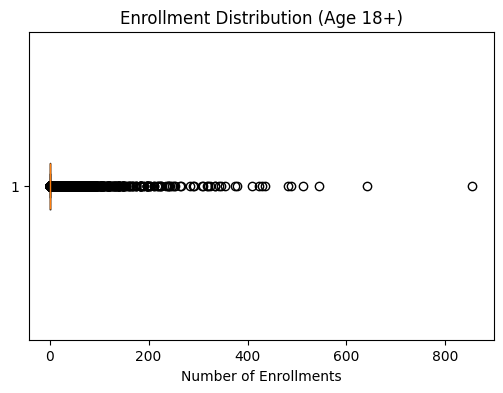

In [23]:
plt.figure(figsize=(6,4))
plt.boxplot(enrollment_df['age_18_greater'], vert=False)
plt.title('Enrollment Distribution (Age 18+)')
plt.xlabel('Number of Enrollments')
plt.show()

The boxplot reveals a highly right-skewed distribution, where most districts have low enrollment counts, while a small number of districts exhibit exceptionally high enrollment volumes. These outliers likely represent urban or high-population regions and highlight unequal enrollment activity across regions.

### Cross Dataset Insights


Enrollment, demographic, and biometric datasets consistently show right-skewed distributions, indicating uneven Aadhaar service utilization across districts.

A significant percentage of districts show zero or near-zero activity across updates, suggesting access, awareness, or infrastructure gaps.

High-population states contribute disproportionately to total updates, increasing the risk of service overload and delays.

Similar regional patterns across all datasets indicate systemic issues rather than isolated update-type problems.

### Problem Statements (Derived from Insights)
Problem Statements Identified

Uneven distribution of Aadhaar enrollment and update activity across regions.
Under-served districts with minimal updates risk exclusion from essential services.

Overloaded districts face operational strain due to high update volumes.

Lack of predictive visibility into future Aadhaar service demand.

### Proposed Solutions

**Operational**

Deploy mobile enrollment/update units in low-activity districts.
Rebalance staffing and appointment slots in high-demand regions.

**Technology**
Monitor biometric failure-heavy districts for hardware upgrades or retraining.
Real-time dashboards for district-level performance monitoring.

**Data & Planning**

Predictive models to forecast update demand.
Early-warning alerts for districts approaching overload.